In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.decomposition import PCA
import sklearn.model_selection as sms


In [42]:
excel = pd.read_excel('AA-AuNP.xlsx', sheet_name=['Xt', 'Yt', 'Xv', 'Yv'])
scaler = StandardScaler()
Xt_stan = pd.DataFrame(scaler.fit_transform(excel['Xt'].drop(columns=['Amino acid'])))
Yt = excel['Yt'].drop(columns=['Amino acid'])
Xv_stan = pd.DataFrame(scaler.fit_transform(excel['Xv'].drop(columns=['Amino acid'])))
Yv = excel['Yv'].drop(columns=['Amino acid'])

In [43]:
Xt_stan

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.525984,0.285376,1.097183,-0.989916,1.260110,-1.185557,0.830580,-1.326636,1.484528,-1.409091,...,-0.214706,-0.112003,-1.508151,-1.470565,-1.291644,-0.864695,-0.867983,-1.491332,-0.746316,-1.464155
1,-0.106711,-0.192000,-0.407118,1.940872,-0.876408,0.830362,0.147166,-0.582899,-1.635612,-1.181818,...,0.626610,-0.064009,-0.840114,-1.065246,-0.766041,-0.864695,-0.939045,-0.820033,-0.746316,-0.642216
2,-1.400198,-2.712650,1.077291,1.511430,0.592038,-0.622527,1.534173,-0.619097,0.007406,-0.727273,...,0.382564,-0.803739,-0.509703,-0.653990,-0.632094,1.033273,-0.796922,-0.502215,-0.616972,-0.372326
3,-0.980197,-0.450360,0.664415,0.741068,0.414788,-0.463841,0.890894,-0.175765,-0.300186,-0.045455,...,0.055705,-0.537686,0.105670,0.063709,0.119364,1.033273,-0.222510,0.166986,-0.280677,0.596826
4,-0.622068,-0.492327,-0.638196,0.363469,-0.677797,0.613858,-0.544567,1.236701,-0.324160,0.863636,...,-1.591099,1.616815,1.042437,0.919103,0.882311,-0.864695,1.068435,1.063798,0.469520,0.940323
5,-0.712328,0.845375,1.491326,-1.301960,1.701462,-1.529740,1.141557,-1.781162,1.792159,-2.090909,...,0.337608,-0.704621,-2.124967,-2.119303,-1.718550,-0.864695,-2.010885,-1.871035,-1.729333,-1.709510
6,0.596445,0.966031,-1.225544,-1.281497,-0.787293,0.732359,-1.618571,0.420568,-0.277496,0.181818,...,-0.173469,-0.583593,0.297929,0.201175,0.172107,0.594654,-0.112958,0.308588,-0.410021,0.535487
7,-0.435724,1.160129,0.670408,-0.692686,0.792778,-0.797372,0.482092,0.043288,0.561727,0.636364,...,-1.224692,1.278772,0.338690,0.578407,0.149913,-0.864695,1.195753,0.245653,1.142110,-0.593145
8,1.980193,0.665703,-1.041642,-0.845359,-0.732508,0.672806,-1.305129,0.415716,0.128352,1.090909,...,1.080563,-0.502213,0.760000,0.945592,1.083361,0.459303,-0.477147,0.655775,-0.487628,1.247016
9,-0.597319,1.274227,0.303651,-0.884053,0.507252,-0.547134,0.053318,0.080233,0.561718,0.636364,...,-1.224692,1.197392,0.337968,0.601242,0.357230,-0.864695,0.405197,0.059997,0.055618,-0.090168


In [44]:
xexcel = pd.read_excel('AA-AuNP.xlsx', sheet_name=['Xt', 'Xv'], usecols=['HOMO[eV]', 'Polarizability [au]', 'Topological polar surface area'])
Xtrain_stan = pd.DataFrame(scaler.fit_transform(xexcel['Xt']))
Xvalid_stan = pd.DataFrame(scaler.fit_transform(xexcel['Xv']))

In [45]:
pls = PLSRegression(n_components=1)
pls.fit(Xtrain_stan, Yt)
Yt_pred = pls.predict(Xtrain_stan)
Yv_pred = pls.predict(Xvalid_stan)

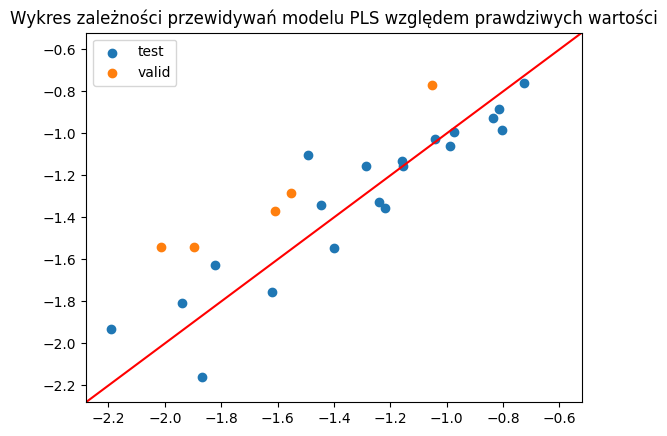

In [46]:
plt.scatter(Yt, Yt_pred, label='test')
plt.scatter(Yv, Yv_pred, label='valid')
plt.axline((-2.2, -2.2), (-0.6, -0.6), color='r')
plt.legend()
plt.title('Wykres zależności przewidywań modelu PLS względem prawdziwych wartości')
plt.show()

In [47]:
R2_pls = pls.score(Xtrain_stan, Yt)
RMSEc_pls = np.sqrt((((Yt_pred - Yt)**2).sum())/Xtrain_stan.shape[0]).iloc[0]
loo = LeaveOneOut()
scores_pls = cross_val_predict(pls, Xtrain_stan, Yt, cv=loo, n_jobs=-1)
Q2cv_pls = (1 - (((scores_pls - Yt))**2).sum()/((Yt - Yt.mean())**2).sum()).iloc[0]
RMSEcv2_pls = np.sqrt((((scores_pls - Yt)**2).sum())/(Xtrain_stan.shape[0])).iloc[0]
Q2ex_pls = (1 - (((Yv - Yv_pred))**2).sum()/((Yv - Yv.mean())**2).sum()).iloc[0]
RMSEex_pls = np.sqrt((((Yv_pred - Yv)**2).sum())/Xvalid_stan.shape[0]).iloc[0]


In [48]:
print(f'R2 = {R2_pls},\nRMSEc = {RMSEc_pls},\nQ2cv = {Q2cv_pls},\nRMSEcv = {RMSEcv2_pls},\nQ2ex = {Q2ex_pls},\nRMSEex = {RMSEex_pls}')

R2 = 0.847115954331954,
RMSEc = 0.1593818955165241,
Q2cv = 0.7566620940768123,
RMSEcv = 0.20107718072008787,
Q2ex = 0.00748107542241272,
RMSEex = 0.3335478166788605


In [49]:
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(Xtrain_stan, Yt)

LinearRegression()

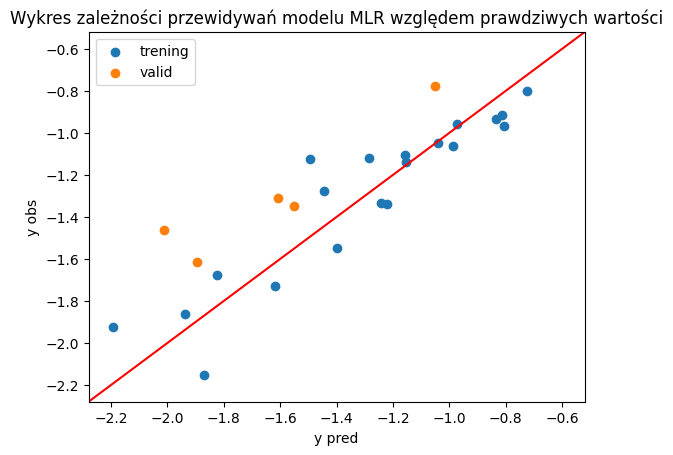

In [50]:
mlr_Yt_pred = regr.predict(Xtrain_stan)
mlr_Yv_pred = regr.predict(Xvalid_stan)
plt.scatter(Yt, mlr_Yt_pred, label="trening")
plt.scatter(Yv, mlr_Yv_pred, label="valid")
plt.axline((-2.2, -2.2), (-0.6, -0.6), color='r')
plt.xlabel('y pred')
plt.ylabel('y obs')
plt.legend()
plt.title("Wykres zależności przewidywań modelu MLR względem prawdziwych wartości")
plt.show()

In [51]:
R2_mlr = regr.score(Xtrain_stan, Yt)
RMSEc_mlr = np.sqrt((((mlr_Yt_pred - Yt)**2).sum())/Xtrain_stan.shape[0]).iloc[0]
scores_mlr = cross_val_predict(regr, Xtrain_stan, Yt, cv=loo, n_jobs=-1)
Q2cv_mlr = (1 - (((scores_mlr - Yt))**2).sum()/((Yt - Yt.mean())**2).sum()).iloc[0]
RMSEcv2_mlr = np.sqrt((((scores_mlr - Yt)**2).sum())/(Xtrain_stan.shape[0])).iloc[0]
Q2ex_mlr = (1 - (((Yv - mlr_Yv_pred))**2).sum()/((Yv - Yv.mean())**2).sum()).iloc[0]
RMSEex_mlr = np.sqrt((((mlr_Yv_pred - Yv)**2).sum())/Xvalid_stan.shape[0]).iloc[0]


In [52]:
print(f'R2 = {R2_mlr},\nRMSEc = {RMSEc_mlr},\nQ2cv = {Q2cv_mlr},\nRMSEcv = {RMSEcv2_mlr},\nQ2ex = {Q2ex_mlr},\nRMSEex = {RMSEex_mlr}')

R2 = 0.8527047624112474,
RMSEc = 0.15644160282297645,
Q2cv = 0.733265037441323,
RMSEcv = 0.21052218880326926,
Q2ex = -0.056520690396840045,
RMSEex = 0.34413409891118757


In [53]:
cov_corr_matrix = Xtrain_stan.corr()
cov_corr_matrix

,0,1,2
0,1.000000,0.685890,0.137305
1,0.685890,1.000000,0.224169
2,0.137305,0.224169,1.000000


In [54]:
pca = PCA()
pca.fit(Xtrain_stan, Yt)
pca_Xtrain_stan = pca.transform(Xtrain_stan)

In [55]:
wariancja = pca.explained_variance_ratio_
wariancja

array([0.5903068 , 0.30694156, 0.10275164])

In [56]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(pca_Xtrain_stan, Yt)

LinearRegression()

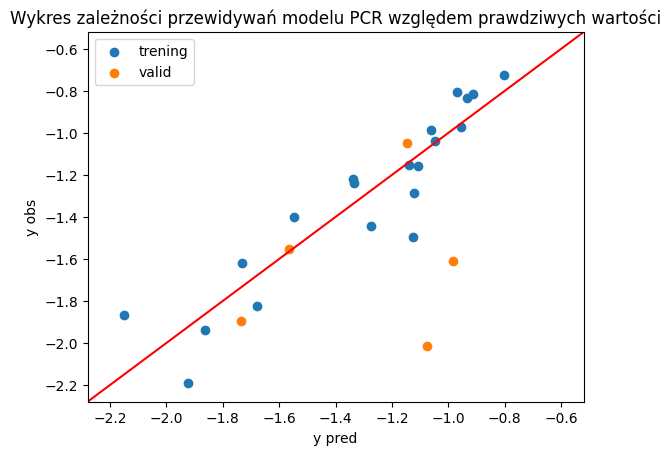

In [57]:
pcr_Yt_pred = model.predict(pca_Xtrain_stan)
pcr_Yv_pred = model.predict(Xvalid_stan)
plt.scatter(pcr_Yt_pred, Yt, label="trening")
plt.scatter(pcr_Yv_pred, Yv, label="valid")
plt.axline((-2.2, -2.2), (-0.6, -0.6), color='r')
plt.xlabel('y pred')
plt.ylabel('y obs')
plt.legend()
plt.title("Wykres zależności przewidywań modelu PCR względem prawdziwych wartości")
plt.show()

In [58]:
R2_pcr = model.score(pca_Xtrain_stan, Yt)
RMSEc_pcr = np.sqrt((((pcr_Yt_pred - Yt)**2).sum())/pca_Xtrain_stan.shape[0]).iloc[0]
scores_pcr = cross_val_predict(model, pca_Xtrain_stan, Yt, cv=loo, n_jobs=-1)
Q2cv_pcr = (1 - (((scores_pcr - Yt))**2).sum()/((Yt - Yt.mean())**2).sum()).iloc[0]
RMSEcv2_pcr = np.sqrt((((scores_pcr - Yt)**2).sum())/(pca_Xtrain_stan.shape[0])).iloc[0]
Q2ex_pcr = (1 - (((Yv - pcr_Yv_pred))**2).sum()/((Yv - Yv.mean())**2).sum()).iloc[0]
RMSEex_pcr = np.sqrt((((pcr_Yv_pred - Yv)**2).sum())/Xvalid_stan.shape[0]).iloc[0]


In [59]:
print(f'WYNIKI PLS\nR2 = {R2_pls},\nRMSEc = {RMSEc_pls},\nQ2cv = {Q2cv_pls},\nRMSEcv = {RMSEcv2_pls},\nQ2ex = {Q2ex_pls},\nRMSEex = {RMSEex_pls}')
print(f'WYNIKI MLR\nR2 = {R2_mlr},\nRMSEc = {RMSEc_mlr},\nQ2cv = {Q2cv_mlr},\nRMSEcv = {RMSEcv2_mlr},\nQ2ex = {Q2ex_mlr},\nRMSEex = {RMSEex_mlr}')
print(f'WYNIKI PCR\nR2 = {R2_pcr},\nRMSEc = {RMSEc_pcr},\nQ2cv = {Q2cv_pcr},\nRMSEcv = {RMSEcv2_pcr},\nQ2ex = {Q2ex_pcr},\nRMSEex = {RMSEex_pcr}')

WYNIKI PLS
R2 = 0.847115954331954,
RMSEc = 0.1593818955165241,
Q2cv = 0.7566620940768123,
RMSEcv = 0.20107718072008787,
Q2ex = 0.00748107542241272,
RMSEex = 0.3335478166788605
WYNIKI MLR
R2 = 0.8527047624112474,
RMSEc = 0.15644160282297645,
Q2cv = 0.733265037441323,
RMSEcv = 0.21052218880326926,
Q2ex = -0.056520690396840045,
RMSEex = 0.34413409891118757
WYNIKI PCR
R2 = 0.8527047624112474,
RMSEc = 0.15644160282297648,
Q2cv = 0.7332650374413231,
RMSEcv = 0.21052218880326923,
Q2ex = -1.3279808386956367,
RMSEex = 0.5108323644414842


INTERPRETACJA WYNIKÓW


1. Wykresy

Według wykresów model PLS jak i MLR ma tendencję do przeszacowywania wartości przewidywanych, a PCR raczej do niedoszacowywania. Dodatkowo, względem przewidywań, wykresy metody PLS i MLR są bardzo do siebie podobne.

2. Macierz korelacji-kowariancji

Według macierzy 
Znajdują się w niej wartości z przediału ok. abs(0.14;0.69). Są to niskie współczynniki korelacji, więc widząc takie wyniki raczej nie wykonywalibyśmy metody PCR na danych. Metoda PCR jest dla silnie skorelowanych zmiennych. Przyjmuje się graniczną wartość na 0.6-0.7. Ewentualnie możnaby zastosować metodę PCR, ale dla tylko jednej zmiennej (tej, która jest reprezentowana przez wartość 0.69)

3. Statystyki dla wybranego modelu


Statystyki $R^2$ oraz $Q^2_{cv}$ dla wszystkich modeli są na dobrym poziomie (0.85 oraz 0.73). Tak samo $RMSE_{c}$ oraz $RMSE_{cv}$ również są niskie, co wskazywałoby na dobre dopasowanie modeli. Jednak statystyka $Q^2_{ex}$ we wszystkich 3 przypadkach jest bliska zeru/ujemna co wskazuje na beznajdziejne przewidywania modeli. Najgorzej radzi sobie model PCR, ale wszystkie byłyby do odrzucenia.
